In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

dataset_x = np.load('./preprocessed_x.npy')
dataset_y = np.load('./preprocessed_y.npy')

In [3]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(dataset_x, dataset_y, test_size = 0.1)

In [20]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(10, 10), random_state=1, learning_rate_init=0.01, max_iter=50000, verbose=True)
clf.fit(X_tr, Y_tr)

predictions = clf.predict(X_ts)

Max Error: 171.52405546971966
Average Error: 25.058248324447387
Ratio Correct to +/- 12 months: 32.17115689381934%
Ratio Correct to +/- 24 months: 57.36925515055468%
Ratio Correct to +/- 36 months: 76.46592709984152%
Ratio Correct to +/- 48 months: 86.60855784469096%


[0, 250, 0, 250]

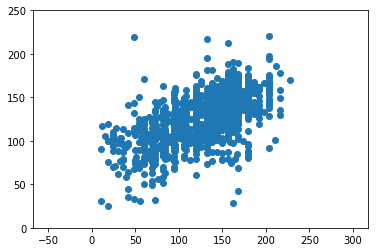

In [25]:
pairs = (list((zip(Y_ts, predictions))))

max_error = max([abs(pair[0] - pair[1]) for pair in pairs])
print (f'Max Error: {max_error}')

average_error = sum([abs(pair[0] - pair[1]) for pair in pairs])/len(pairs)
print (f'Average Error: {average_error}')


for month_threshold in [12, 24, 36, 48]:
    month_threshold_ratio = (len([
                                pair for pair in pairs 
                                if (abs(pair[0] - pair[1]) <= month_threshold)
                             ]) /
                             len(pairs) * 100)
    print (f'Ratio Correct to +/- {month_threshold} months: {month_threshold_ratio}%')


plt.scatter(Y_ts, predictions)
plt.axis('equal')
plt.axis([0, 250, 0, 250])